In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
test_data = (pd.read_csv('/content/drive/My Drive/Test/HW4/1/Test_Data.csv', header = None)).to_numpy()
test_label = (pd.read_csv('/content/drive/My Drive/Test/HW4/1/Test_Labels.csv', header = None)).to_numpy()
train_data = (pd.read_csv('/content/drive/My Drive/Test/HW4/1/Train_Data.csv', header = None)).to_numpy()
train_label = (pd.read_csv('/content/drive/My Drive/Test/HW4/1/Train_Labels.csv', header = None)).to_numpy()

In [5]:
def Initilize_Centroids(train_data):
  m = np.zeros((3, 13))
  for i in range(3):
    m[i] = train_data[np.random.randint(145)]
  return m

In [6]:
def Nearest_Cluster(m, point):
  d = np.zeros(3)
  for i in range(3):
    x = point - m[i]
    d[i] = np.sqrt(np.inner(x, x))
  return np.argmin(d)

In [7]:
def Cost(C, data, m):
  cost = 0
  N = (data.shape)[0]
  for i in range(N):
    x = data[i] - m[int(C[i])]
    cost += np.sqrt(np.inner(x, x))
  return cost

In [8]:
def Train(train_data):
  N = (train_data.shape)[0]
  param = np.zeros((3, 13))
  cost = 0
  for i in range(10):
    m = Initilize_Centroids(train_data)
    C = np.zeros(N)
    while(True):
      sum_of_cluster = np.zeros((3, 13))
      count = np.zeros((3, 1))
      for j in range(N):
        C[j] = Nearest_Cluster(m, train_data[j])
        indx = int(C[j])
        sum_of_cluster[indx] += train_data[j]
        count[indx] += 1
      temp = m.copy()
      for j in range(3):
        if count[j] != 0:
          m[j] = (sum_of_cluster[j] / count[j])
      comp = temp == m
      if comp.all():
        help = Cost(C, train_data, m)
        if i == 0:
          param = m.copy()
          cost = help
        else:
          if help < cost:
            cost = help
            param = m.copy()
        break
  return param

In [9]:
def Update_Confusion_Matrix(matrix, predicted_label, label):
  matrix[int(label - 1)][int(predicted_label)] += 1
  return matrix

In [18]:
def Test(test_data, test_label, m):
  N = (test_data.shape)[0]
  confusion_matrix = np.zeros((3, 3))
  labels = np.zeros(N)
  for i in range(N):
    labels[i] = Nearest_Cluster(m, test_data[i])
    confusion_matrix = Update_Confusion_Matrix(confusion_matrix, labels[i], test_label[i])
  ax = plt.axes()
  sns.heatmap(confusion_matrix, annot = True, fmt = '.0f' , ax = ax)
  ax.set_title('from scratch')
  plt.show()

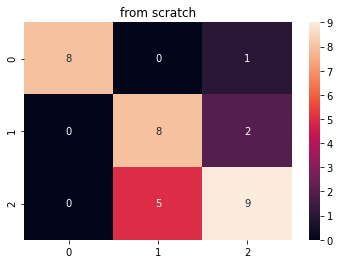

In [22]:
m = Train(train_data)
Test(test_data, test_label, m)

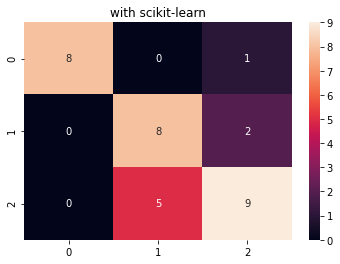

In [41]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(init = 'random', n_clusters = 3, n_init = 100)
kmeans.fit(train_data)
predicted_labels = kmeans.predict(test_data)
confusion_matrix = metrics.confusion_matrix((np.transpose(test_label)[0]), (predicted_labels+1), labels=[1, 2, 3])
ax = plt.axes()
sns.heatmap(confusion_matrix, annot = True, fmt = '.0f' , ax = ax)
ax.set_title('with scikit-learn')
plt.show()